In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random
from scipy.optimize import curve_fit

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [70]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200716/Bead7/Discharge/Discharge0717/', start_file=180)

298  files in folder
118  files loaded


In [51]:
bbb = bdf_discharge[0]

In [53]:
bbb.electrode_channels

array([0, 0], dtype=uint16)

In [9]:
gfw = GravityFramework.GravityFramework()

In [71]:
m1 = gfw.build_x_response(bdf_discharge, drive_freq=71, charges=10, bandwidth=1, decimate=10)

***************************************************
X2-amplitude:  6.40e-01
reduced chi2:  0.11823035081439136
***************************************************
X2-amplitude:  1.05e-01
reduced chi2:  0.2447727372265939
***************************************************
X2-amplitude:  4.31e+00
reduced chi2:  0.6947163624486242
***************************************************
X2-amplitude:  8.11e-01
reduced chi2:  0.2357004512263248
***************************************************
X2-amplitude:  1.28e+01
reduced chi2:  0.22718693860316477
***************************************************
X2-amplitude:  1.29e+01
reduced chi2:  0.3655749244399395
***************************************************
X2-amplitude:  1.31e+01
reduced chi2:  0.9392649289169193
***************************************************
X2-amplitude:  1.32e+01
reduced chi2:  0.3607137411674899
***************************************************
X2-amplitude:  4.39e+00
reduced chi2:  0.28481586683858523
*******

***************************************************
X2-amplitude:  1.00e+03
reduced chi2:  5116162.552774208
***************************************************
X2-amplitude:  1.00e+03
reduced chi2:  5632011.142866635
***************************************************
X2-amplitude:  1.00e+03
reduced chi2:  6315625.852681679
***************************************************
X2-amplitude:  3.17e+00
reduced chi2:  10253.82742458734
***************************************************
X2-amplitude:  5.99e+00
reduced chi2:  9467.947200131113
***************************************************
X2-amplitude:  5.62e+00
reduced chi2:  5333.698434313368
***************************************************
X2-amplitude:  5.37e+00
reduced chi2:  8011.648452751483
***************************************************
X2-amplitude:  5.28e+00
reduced chi2:  8949.781237652793
***************************************************
X2-amplitude:  5.03e+00
reduced chi2:  6996.996263476667
*******************

In [72]:
# phases = [m_.values[2] for m_ in m1]
amps = [m_.values[0] for m_ in m1]
# amps2 = [m_.values[0] for m_ in m2]

In [49]:
m1[0].values

<ValueView of Minuit at 339b3728>
  A: 11.561107879178634
  A2: 0.14744332841359897
  f: 71.0
  f2: 71.0
  phi: -0.061682317004637
  delta_phi: 0.07889019548895959

<IPython.core.display.Javascript object>


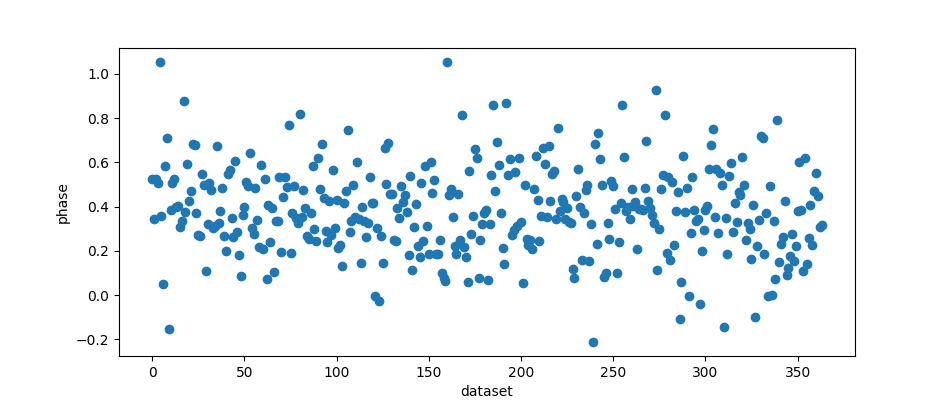

0.38570957465645606


In [73]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(len(phases)), phases)
ax.set(xlabel='dataset', ylabel='phase')
print(np.mean(phases[20:140]))

In [44]:
amps[128]*=2

<IPython.core.display.Javascript object>


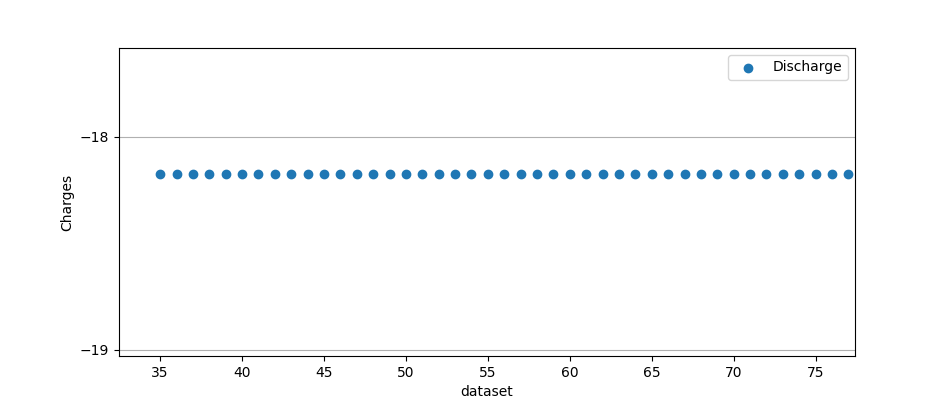

In [74]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1.2

ax.scatter(range(len(amps)), np.array(amps)/scale/extra_scale, label='Discharge')
# ax.scatter(range(len(amps2)), np.array(amps2)/scale/extra_scale, label='Discharge3 - bimodal')

ax.legend()
ax.set(xlabel='dataset', ylabel='Charges', ylim=(None,None), xlim=(None,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [47]:
bdf_force = load_dir(dirname='/data/new_trap/20200716/Bead7/Discharge/ForceCalibration0717/')

15  files in folder
15  files loaded


In [48]:
m1 = gfw.build_x_response(bdf_force[5:10], drive_freq=71, charges=3, bandwidth=1, decimate=10)

***************************************************
X2-amplitude:  1.30e+01
reduced chi2:  0.69914060334674
***************************************************
X2-amplitude:  1.28e+01
reduced chi2:  0.18322652641390666
***************************************************
X2-amplitude:  1.30e+01
reduced chi2:  0.7850719160532096
***************************************************
X2-amplitude:  1.31e+01
reduced chi2:  0.23036155598354255
***************************************************
X2-amplitude:  1.32e+01
reduced chi2:  0.22350630513198824
X3 to X2 ratio: 0.15
X2 response (amplitude): 13.011768187146846
X2 response (amplitude): 13.011768187146846


In [149]:
phase1_x = [m_.values[4] for m_ in m1]
phase2_x = [m_.values[5] for m_ in m1]
amps1_x = [m_.values[0] for m_ in m1]
amps2_x = [m_.values[1] for m_ in m1]

<IPython.core.display.Javascript object>


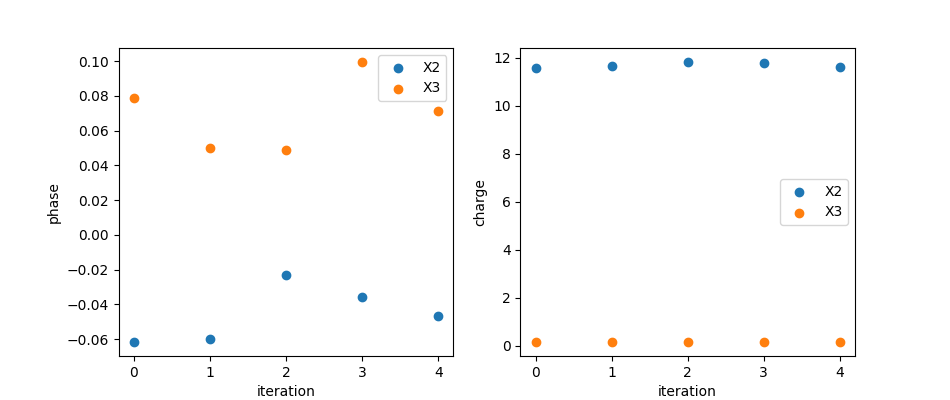

[Text(0, 0.5, 'charge'), Text(0.5, 0, 'iteration')]

In [150]:
scaleX = gfw.scale_X2*1.6e-19 * 20 / 8e-3 * 0.61
scaleX3 = gfw.A2_mean/3

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(5), phase1_x, label='X2')
ax[0].scatter(range(5), phase2_x, label='X3')
ax[1].scatter(range(5), amps1_x, label='X2')
ax[1].scatter(range(5), amps2_x, label='X3')
[a.legend() for a in ax]
ax[0].set(xlabel='iteration', ylabel='phase')
ax[1].set(xlabel='iteration', ylabel='charge')

In [255]:
bdf_mCharge = load_dir(dirname='/data/new_trap/20200713/Bead1/Millicharge/3.9VSpin0714/', start_file=5000, max_file=1)

6000  files in folder
1  files loaded


In [243]:
m10 = gfw.build_x_response(bdf_mCharge, drive_freq=71, charges=3, bandwidth=1, decimate=10)

***************************************************
X2-amplitude:  2.46e-02
reduced chi2:  0.2324422931792454
***************************************************
X2-amplitude:  1.20e-01
reduced chi2:  0.1268948199360476
***************************************************
X2-amplitude:  1.18e-02
reduced chi2:  0.3792293429431277
***************************************************
X2-amplitude:  1.67e-02
reduced chi2:  0.2632686346204189
***************************************************
X2-amplitude:  1.05e-01
reduced chi2:  0.2759501639933026
***************************************************
X2-amplitude:  1.28e-01
reduced chi2:  0.21427459368450996
***************************************************
X2-amplitude:  1.17e-01
reduced chi2:  0.6778788597728701
***************************************************
X2-amplitude:  2.95e-02
reduced chi2:  0.5653140469012018
***************************************************
X2-amplitude:  2.38e-02
reduced chi2:  0.37953184589554684
********

***************************************************
X2-amplitude:  5.10e-02
reduced chi2:  0.16816959837817994
***************************************************
X2-amplitude:  1.58e-01
reduced chi2:  0.15486259259597854
***************************************************
X2-amplitude:  2.67e-01
reduced chi2:  0.24454830289766777
***************************************************
X2-amplitude:  1.45e-01
reduced chi2:  0.09495104260172535
***************************************************
X2-amplitude:  1.62e-02
reduced chi2:  0.15384642972667714
***************************************************
X2-amplitude:  3.17e-01
reduced chi2:  0.1723857584349595
***************************************************
X2-amplitude:  1.71e-01
reduced chi2:  0.13072087712414282
***************************************************
X2-amplitude:  1.64e-01
reduced chi2:  0.33076999215345865
***************************************************
X2-amplitude:  4.38e-02
reduced chi2:  0.5538507140740677
***

***************************************************
X2-amplitude:  6.62e-02
reduced chi2:  0.20880428252836636
***************************************************
X2-amplitude:  1.01e-01
reduced chi2:  0.12913386448748088
***************************************************
X2-amplitude:  1.33e-01
reduced chi2:  0.5709295603904356
***************************************************
X2-amplitude:  6.58e-02
reduced chi2:  0.44148522340521357
***************************************************
X2-amplitude:  3.59e-01
reduced chi2:  0.47174709886717725
***************************************************
X2-amplitude:  4.45e-02
reduced chi2:  0.3481578005047222
***************************************************
X2-amplitude:  8.24e-02
reduced chi2:  0.4621896065955222
***************************************************
X2-amplitude:  4.41e-02
reduced chi2:  0.4892082739273262
***************************************************
X2-amplitude:  1.59e-02
reduced chi2:  0.1830290918559642
******

***************************************************
X2-amplitude:  2.67e-01
reduced chi2:  0.18975377250654582
***************************************************
X2-amplitude:  1.23e-01
reduced chi2:  0.09344134532510404
***************************************************
X2-amplitude:  1.02e-01
reduced chi2:  0.15739547335620532
***************************************************
X2-amplitude:  1.72e-01
reduced chi2:  0.2064897772781028
***************************************************
X2-amplitude:  4.14e-02
reduced chi2:  0.17238422627021496
***************************************************
X2-amplitude:  8.33e-02
reduced chi2:  0.42012210111389897
***************************************************
X2-amplitude:  1.15e-01
reduced chi2:  0.5032650549078217
***************************************************
X2-amplitude:  1.44e-01
reduced chi2:  0.3393058815494407
***************************************************
X2-amplitude:  2.16e-01
reduced chi2:  0.18936343476523795
****

***************************************************
X2-amplitude:  7.69e-02
reduced chi2:  0.5631284936868384
***************************************************
X2-amplitude:  1.05e-01
reduced chi2:  0.5381820711922229
***************************************************
X2-amplitude:  3.49e-02
reduced chi2:  0.2090207666258858
***************************************************
X2-amplitude:  1.86e-01
reduced chi2:  0.17542236880362055
***************************************************
X2-amplitude:  6.83e-02
reduced chi2:  0.2029792065809624
***************************************************
X2-amplitude:  9.73e-02
reduced chi2:  0.11458838819424327
***************************************************
X2-amplitude:  1.63e-01
reduced chi2:  0.22017215622861736
***************************************************
X2-amplitude:  1.05e-01
reduced chi2:  0.1271514012667242
***************************************************
X2-amplitude:  3.17e-01
reduced chi2:  0.1436063374307553
*******

***************************************************
X2-amplitude:  2.45e-01
reduced chi2:  0.09488459271755813
***************************************************
X2-amplitude:  9.63e-02
reduced chi2:  0.1488361600898532
***************************************************
X2-amplitude:  1.39e-02
reduced chi2:  0.22733362709385763
***************************************************
X2-amplitude:  1.85e-01
reduced chi2:  0.16038638373846112
***************************************************
X2-amplitude:  1.34e-02
reduced chi2:  0.1324277991111308
***************************************************
X2-amplitude:  1.69e-01
reduced chi2:  0.1374764019457124
***************************************************
X2-amplitude:  9.30e-03
reduced chi2:  0.2215028040363258
***************************************************
X2-amplitude:  4.12e-02
reduced chi2:  0.23179128530148171
***************************************************
X2-amplitude:  6.32e-03
reduced chi2:  0.34010631664319213
*****

***************************************************
X2-amplitude:  4.24e-02
reduced chi2:  0.16120104609084354
***************************************************
X2-amplitude:  4.50e-02
reduced chi2:  0.2069401494286235
***************************************************
X2-amplitude:  7.52e-02
reduced chi2:  0.1272533199419125
***************************************************
X2-amplitude:  7.18e-02
reduced chi2:  0.3351574089562277
***************************************************
X2-amplitude:  1.20e-01
reduced chi2:  0.6761070781448238
***************************************************
X2-amplitude:  6.14e-02
reduced chi2:  0.6180994142556174
***************************************************
X2-amplitude:  1.37e-02
reduced chi2:  0.5893407678298672
***************************************************
X2-amplitude:  1.72e-01
reduced chi2:  0.5658098880836019
***************************************************
X2-amplitude:  6.94e-02
reduced chi2:  0.47863450960560744
********

In [244]:
# phase8_x = [m_.values[4] for m_ in m6]
# phase9_x = [m_.values[5] for m_ in m6]
amps13_x = [m_.values[0]/20 for m_ in m10]
# amps9_x = [m_.values[1]/20 for m_ in m6]

<IPython.core.display.Javascript object>


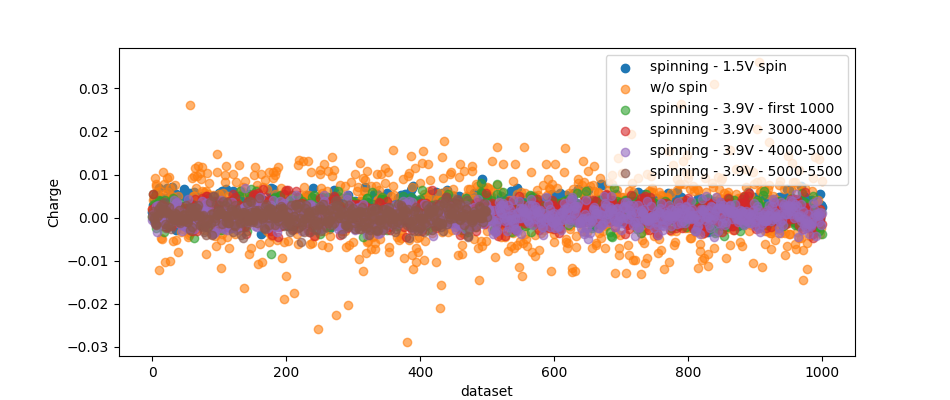

In [245]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(range(1000), amps4_x/scaleX, label='spinning - 1.5V spin')
ax.scatter(range(1000), amps6_x/scaleX, alpha=0.6, label='w/o spin')
# ax.scatter(range(len(amps8_x)), amps8_x/scaleX, alpha=0.6, label='spinning - 3.9V')
ax.scatter(range(len(amps10_x)), amps10_x/scaleX, alpha=0.6, label='spinning - 3.9V - first 1000')
ax.scatter(range(len(amps11_x)), amps11_x/scaleX, alpha=0.6, label='spinning - 3.9V - 3000-4000')
ax.scatter(range(len(amps12_x)), amps12_x/scaleX, alpha=0.6, label='spinning - 3.9V - 4000-5000')
ax.scatter(range(len(amps13_x)), amps13_x/scaleX, alpha=0.6, label='spinning - 3.9V - 5000-5500')
# ax.scatter(range(1000), amps5_x/scaleX3, label='X2')
ax.set(ylabel='Charge', xlabel='dataset')
ax.legend()

<IPython.core.display.Javascript object>


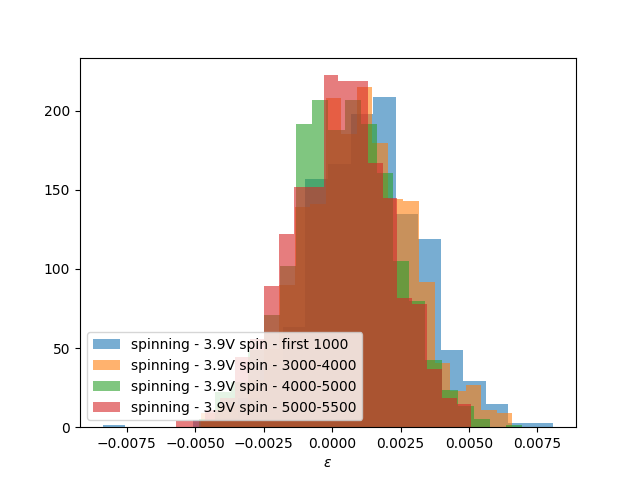

0.0022699576848493317 0.003565713516883217 0.001292375036567456 0.0008938693024780711 0.00040334882632276183 0.00028015065749407097
mean:  
1.29e-03 
8.94e-04 
4.03e-04 
2.80e-04
std:  5.84e-05


[Text(0.5, 0, '$\\epsilon$')]

In [254]:
_,ax = plt.subplots()
# _ = ax.hist(amps4_x/scaleX, bins=30, label='spinning - 1.5V spin')
# _ = ax.hist(amps8_x/scaleX, bins=30, alpha=0.6, label='spinning - 3.9V spin')
_ = ax.hist(amps10_x/scaleX, bins=20, alpha=0.6, density=True, label='spinning - 3.9V spin - first 1000')
_ = ax.hist(amps11_x/scaleX, bins=20, alpha=0.6, density=True, label='spinning - 3.9V spin - 3000-4000')
_ = ax.hist(amps12_x/scaleX, bins=20, alpha=0.6, density=True, label='spinning - 3.9V spin - 4000-5000')
_ = ax.hist(amps13_x/scaleX, bins=20, alpha=0.6, density=True, label='spinning - 3.9V spin - 5000-5500')
print(np.mean(amps4_x/scaleX), np.mean(amps8_x/scaleX), np.mean(amps10_x/scaleX), np.mean(amps11_x/scaleX), 
      np.mean(amps12_x/scaleX), np.mean(amps13_x/scaleX))
print('mean: ', '\n{:.2e}'.format(np.mean(amps10_x/scaleX)), 
      '\n{:.2e}'.format(np.mean(amps11_x/scaleX)), 
      '\n{:.2e}'.format(np.mean(amps12_x/scaleX)),
     '\n{:.2e}'.format(np.mean(amps13_x/scaleX)))
print('std: ',  '{:.2e}'.format(np.std(amps12_x/scaleX)/np.sqrt(1000)))
ax.legend(loc='lower left')
ax.set(xlabel=r'$\epsilon$')

### EDM drift

In [6]:
bdf_force = load_dir(dirname='/data/new_trap/20200713/Bead1/ForceCalibration0713/', max_file=159)

45  files in folder
45  files loaded


In [7]:
gfw = GravityFramework.GravityFramework()
m1 = gfw.build_x_response(bdf_force[35:40], drive_freq=71, charges=3, bandwidth=1, decimate=10)
scaleX = gfw.scale_X2*1.6e-19 * 20 / 8e-3 * 0.61
scaleX3 = gfw.A2_mean/3
del gfw

***************************************************
X2-amplitude:  1.15e+01
reduced chi2:  0.41245700756482834
***************************************************
X2-amplitude:  1.16e+01
reduced chi2:  0.43666190382661274
***************************************************
X2-amplitude:  1.18e+01
reduced chi2:  0.24672195899486513
***************************************************
X2-amplitude:  1.18e+01
reduced chi2:  0.28891067079332633
***************************************************
X2-amplitude:  1.16e+01
reduced chi2:  0.32260914492812126
X3 to X2 ratio: 0.15
X2 response (amplitude): 11.670005668134127
X2 response (amplitude): 11.670005668134127


In [22]:
scaleX2 = np.mean([func3(bb) for bb in bdf_force[35:40]])/3

<ValueView of Minuit at 177fd9d8>
  A: 115.35294703776276
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.062206867206789696
<ValueView of Minuit at 177fd6d8>
  A: 116.41180505819602
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.03494667146982433
<ValueView of Minuit at 1f8e838>
  A: 118.25140355435565
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.07069513673772931
<ValueView of Minuit at 11e5cf28>
  A: 118.09059039007707
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.10840070069722696
<ValueView of Minuit at 11e58458>
  A: 117.11477617356513
  A2: 0.889
  f: 71.0
  f2: 71.0
  phi: -0.045
  delta_phi: 0.06955702427213861


In [29]:
from multiprocessing import Pool
drive_freq = 71
fit_kwargs = {'A': 0, 'f': drive_freq, 'phi': -0.045, 'A2': 0.889, 'f2': drive_freq,
              'delta_phi': 0.0,
              'error_A': 1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'error_A2': 1, 'error_f2': 1, 'error_delta_phi': 0.1,
              'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_delta_phi': [-2 * np.pi, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_A2': [0, 1000],
              'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_f2': True, 'fix_delta_phi': True,
              'fix_A2': True}
bandwidth=1
decimate = 10
ll = likelihood_analyser.LikelihoodAnalyser()

In [30]:
def func1(i):
# for i,bdf_ in enumerate(data_bdfs2):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200713/Bead1/Millicharge/3.9VSpin0714/Discharge_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    frequency = fit_kwargs['f']

    xx2 = bb.response_at_freq2('x', frequency, bandwidth=bandwidth) * 500000
    xx2 = xx2[5000:-5000:decimate]  # cut out the first and last second

    xx3 = bb.response_at_freq3('x', frequency, bandwidth=bandwidth) * 10
    xx3 = xx3[5000:-5000:decimate]  # cut out the first and last second

    m1_tmp = ll.find_mle_2sin(xx2, xx3, fsamp=5000 / decimate,
                                     noise_rms=1,
                                     noise_rms2=1,
                                     plot=False, suppress_print=True, **fit_kwargs)


    return m1_tmp.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_mle_spin4 = np.array(pool.map(func1, range(5500)))
    pool.close()

0   ******************
70   ******************
175   ******************
140   ******************
210   ******************
245   ******************
315   ******************
35   ******************
280   ******************
350   ******************
490   ******************
105   ******************
525   ******************
420   ******************
455   ******************
385   ******************
595   ******************
665   ******************
630   ******************
735   ******************
560   ******************
770   ******************
700   ******************
875   ******************
805   ******************
910   ******************
1050   ******************
840   ******************
945   ******************
1330   ******************
1015   ******************
1085   ******************
1190   ******************
1155   ******************
1120   ******************
1260   ******************
1225   ******************
1295   ******************
1365   ******************
980   ************

498   ******************
1303   ******************
603   ******************
323   ******************
882   ******************
462   ******************
78   ******************
358   ******************
1233   ******************
987   ******************
1163   ******************
778   ******************
43   ******************
918   ******************
638   ******************
1198   ******************
1093   ******************
287   ******************
813   ******************
534   ******************
184   ******************
849   ******************
1374   ******************
708   ******************
673   ******************
147   ******************
1024   ******************
954   ******************
428   ******************
568   ******************
10   ******************
254   ******************
1128   ******************
112   ******************
394   ******************
1059   ******************
499   ******************
743   ******************
604   ******************
883   *************

51   ******************
1135   ******************
295   ******************
750   ******************
542   ******************
1100   ******************
1242   ******************
994   ******************
857   ******************
18   ******************
192   ******************
891   ******************
576   ******************
332   ******************
506   ******************
1067   ******************
716   ******************
822   ******************
681   ******************
225   ******************
612   ******************
261   ******************
1172   ******************
401   ******************
1382   ******************
926   ******************
87   ******************
1206   ******************
1312   ******************
471   ******************
1032   ******************
436   ******************
647   ******************
1346   ******************
366   ******************
963   ******************
1277   ******************
52   ******************
543   ******************
156   ************

94   ******************
164   ******************
1002   ******************
899   ******************
654   ******************
794   ******************
478   ******************
270   ******************
373   ******************
830   ******************
1107   ******************
127   ******************
232   ******************
971   ******************
724   ******************
1143   ******************
59   ******************
1040   ******************
933   ******************
758   ******************
1214   ******************
444   ******************
621   ******************
409   ******************
551   ******************
514   ******************
1354   ******************
1390   ******************
1076   ******************
201   ******************
28   ******************
341   ******************
584   ******************
303   ******************
691   ******************
1321   ******************
1285   ******************
866   ******************
165   ******************
1003   ***********

802   ******************
733   ******************
348   ******************
663   ******************
451   ******************
559   ******************
1048   ******************
1435   ******************
1151   ******************
1116   ******************
172   ******************
839   ******************
1011   ******************
766   ******************
381   ******************
1401   ******************
1470   ******************
1188   ******************
872   ******************
486   ******************
908   ******************
1328   ******************
1222   ******************
1258   ******************
699   ******************
1505   ******************
1362   ******************
135   ******************
592   ******************
417   ******************
240   ******************
629   ******************
209   ******************
1398   ******************
664   ******************
349   ******************
311   ******************
523   ******************
734   ******************
1294   ****

1861   ******************
1757   ******************
2559   ******************
1896   ******************
2036   ******************
1582   ******************
1547   ******************
1477   ******************
2245   ******************
2210   ******************
2767   ******************
1616   ******************
2384   ******************
2419   ******************
2524   ******************
2489   ******************
2629   ******************
1652   ******************
1443   ******************
2001   ******************
2663   ******************
2105   ******************
2314   ******************
1722   ******************
1966   ******************
1792   ******************
1687   ******************
2454   ******************
1514   ******************
2349   ******************
2140   ******************
2594   ******************
2733   ******************
2176   ******************
2070   ******************
1410   ******************
1758   ******************
2281   ******************
1931   *****

2567   ******************
2704   ******************
2775   ******************
1660   ******************
2532   ******************
2426   ******************
2461   ******************
1938   ******************
1418   ******************
2218   ******************
1450   ******************
2288   ******************
2392   ******************
1590   ******************
2741   ******************
2147   ******************
1729   ******************
1624   ******************
2356   ******************
2255   ******************
2112   ******************
2637   ******************
1695   ******************
1906   ******************
1485   ******************
1869   ******************
1835   ******************
1973   ******************
2184   ******************
1522   ******************
2670   ******************
1766   ******************
2497   ******************
2323   ******************
2009   ******************
2045   ******************
1801   ******************
2078   ******************
2776   *****

1877   ******************
1528   ******************
1945   ******************
2118   ******************
1458   ******************
2261   ******************
2575   ******************
2053   ******************
2226   ******************
2468   ******************
1772   ******************
2541   ******************
2296   ******************
2401   ******************
1668   ******************
1981   ******************
1564   ******************
2192   ******************
2677   ******************
2610   ******************
1491   ******************
2436   ******************
2646   ******************
2749   ******************
2504   ******************
2017   ******************
1844   ******************
1703   ******************
2783   ******************
1599   ******************
2713   ******************
1809   ******************
2365   ******************
2156   ******************
2086   ******************
1915   ******************
1459   ******************
1631   ******************
1428   *****

1604   ******************
2618   ******************
1923   ******************
2126   ******************
2304   ******************
2683   ******************
2269   ******************
1816   ******************
2790   ******************
2198   ******************
1710   ******************
2232   ******************
1572   ******************
1990   ******************
2165   ******************
2654   ******************
2095   ******************
2513   ******************
1537   ******************
1954   ******************
1885   ******************
1779   ******************
2063   ******************
1677   ******************
2550   ******************
1852   ******************
2583   ******************
1500   ******************
2758   ******************
1637   ******************
2801   ******************
1924   ******************
2199   ******************
2270   ******************
2305   ******************
1817   ******************
2338   ******************
1711   ******************
2127   *****

2807   ******************
3152   ******************
3502   ******************
2911   ******************
3188   ******************
2134   ******************
3746   ******************
2979   ******************
3607   ******************
3537   ******************
3781   ******************
3117   ******************
3083   ******************
3816   ******************
2691   ******************
3467   ******************
2482   ******************
1644   ******************
2377   ******************
3293   ******************
3572   ******************
3920   ******************
3433   ******************
2728   ******************
3050   ******************
3851   ******************
2842   ******************
3258   ******************
2946   ******************
2877   ******************
3398   ******************
3328   ******************
3712   ******************
2799   ******************
3503   ******************
2912   ******************
3886   ******************
3223   ******************
3363   *****

3579   ******************
3197   ******************
4135   ******************
4169   ******************
3754   ******************
3265   ******************
3684   ******************
3544   ******************
3440   ******************
3022   ******************
3615   ******************
3334   ******************
3859   ******************
4065   ******************
2955   ******************
3511   ******************
3159   ******************
2920   ******************
2988   ******************
3927   ******************
3124   ******************
2817   ******************
3406   ******************
3893   ******************
3301   ******************
2850   ******************
3998   ******************
3369   ******************
3719   ******************
3790   ******************
3476   ******************
3825   ******************
3092   ******************
3650   ******************
3231   ******************
4100   ******************
3963   ******************
2884   ******************
4031   *****

2927   ******************
3030   ******************
3587   ******************
3727   ******************
3308   ******************
3239   ******************
3900   ******************
3377   ******************
4142   ******************
3448   ******************
3797   ******************
3658   ******************
3692   ******************
4006   ******************
3832   ******************
3132   ******************
3414   ******************
3518   ******************
3066   ******************
3935   ******************
4073   ******************
2892   ******************
4107   ******************
4039   ******************
2859   ******************
3483   ******************
4179   ******************
3273   ******************
3206   ******************
3031   ******************
3867   ******************
3588   ******************
2997   ******************
3341   ******************
2928   ******************
3624   ******************
3167   ******************
3552   ******************
3763   *****

2867   ******************
3596   ******************
4115   ******************
3560   ******************
3699   ******************
3107   ******************
3140   ******************
3174   ******************
3526   ******************
3316   ******************
3004   ******************
3943   ******************
3456   ******************
3248   ******************
4015   ******************
2936   ******************
3665   ******************
3074   ******************
3840   ******************
3349   ******************
3038   ******************
2971   ******************
2831   ******************
3213   ******************
3805   ******************
3420   ******************
4151   ******************
3978   ******************
3491   ******************
2900   ******************
4048   ******************
3876   ******************
4080   ******************
3597   ******************
3561   ******************
4116   ******************
3908   ******************
3633   ******************
3735   *****

3779   ******************
4055   ******************
3392   ******************
3848   ******************
3706   ******************
3147   ******************
3672   ******************
4412   ******************
4273   ******************
4123   ******************
3289   ******************
4158   ******************
4342   ******************
4655   ******************
4690   ******************
4620   ******************
3568   ******************
4308   ******************
3182   ******************
4088   ******************
3499   ******************
4481   ******************
4516   ******************
3534   ******************
3427   ******************
4447   ******************
4023   ******************
3916   ******************
4239   ******************
4551   ******************
3952   ******************
3985   ******************
4206   ******************
4378   ******************
3357   ******************
3813   ******************
4725   ******************
4760   ******************
4413   *****

4905   ******************
4975   ******************
5496   ******************
4802   ******************
5149   ******************
4698   ******************
5427   ******************
4872   ******************
5394   ******************
4385   ******************
4558   ******************
4767   ******************
4523   ******************
4214   ******************
4594   ******************
4281   ******************
4489   ******************
5184   ******************
5289   ******************
5010   ******************
5255   ******************
5046   ******************
4628   ******************
4733   ******************
5324   ******************
4837   ******************
4317   ******************
4247   ******************
5360   ******************
5221   ******************
4351   ******************
4454   ******************
5497   ******************
4664   ******************
5462   ******************
5082   ******************
4941   ******************
5395   ******************
4420   *****

4426   ******************
5368   ******************
5122   ******************
4913   ******************
5333   ******************
5052   ******************
4393   ******************
4290   ******************
4707   ******************
5263   ******************
4949   ******************
5157   ******************
5435   ******************
4497   ******************
5192   ******************
5090   ******************
4672   ******************
5470   ******************
4531   ******************
4603   ******************
5403   ******************
4463   ******************
4224   ******************
4326   ******************
4845   ******************
5018   ******************
4360   ******************
5297   ******************
4567   ******************
4776   ******************
4742   ******************
4256   ******************
4882   ******************
5229   ******************
4985   ******************
5123   ******************
4637   ******************
4914   ******************
4812   *****

5236   ******************
4575   ******************
5410   ******************
4472   ******************
4716   ******************
4784   ******************
5099   ******************
4681   ******************
5305   ******************
5061   ******************
4923   ******************
4434   ******************
5200   ******************
5271   ******************
4264   ******************
4402   ******************
4750   ******************
4539   ******************
4820   ******************
5165   ******************
4891   ******************
4958   ******************
4299   ******************
4233   ******************
5443   ******************
5479   ******************
4368   ******************
4994   ******************
5377   ******************
4854   ******************
4335   ******************
4612   ******************
4646   ******************
5132   ******************
5237   ******************
4576   ******************
4717   ******************
5411   ******************
5342   *****

4547   ******************
5175   ******************
5418   ******************
5314   ******************
5246   ******************
5002   ******************
5209   ******************
4654   ******************
5035   ******************
5108   ******************
4863   ******************
4829   ******************
5487   ******************
5453   ******************
4794   ******************
5141   ******************
4444   ******************
4967   ******************
5387   ******************
4548   ******************
4932   ******************
4514   ******************
5281   ******************
5315   ******************
5176   ******************
5351   ******************
5071   ******************
5419   ******************
5247   ******************
5003   ******************
5036   ******************
5210   ******************
5454   ******************
5109   ******************
5142   ******************
4864   ******************
5488   ******************
4968   ******************
5388   *****

In [10]:
from multiprocessing import Pool
drive_freq = 71
fit_kwargs2 = {'A': 0, 'phi': 0.0, 'sigma': 1.,
              'error_A': 1, 'error_phi': 0.5, 'errordef': 1,
              'error_sigma': 1,
              'limit_phi': [-2 * np.pi, 2 * np.pi], 'limit_A': [-1000, 1000],
              'print_level': 0, 'fix_phi': True, 'fix_sigma': True}
bandwidth=1
decimate = 10
ll = likelihood_analyser.LikelihoodAnalyser()

In [11]:
from scipy import signal
from iminuit import Minuit

def func100_cal(i):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200713/Bead1/ForceCalibration0713/Discharge_'+str(i)+'.h5'
    bb100 = BeadDataFile.BeadDataFile(fname=fname)
    
    fname = r'/data/new_trap/20200713/Bead1/ForceCalibration0713//Discharge_'+str(i+1)+'.h5'
    bb101 = BeadDataFile.BeadDataFile(fname=fname)
    
    ll.data_x = np.arange(0, len(bb100.x2)) / 5000
    ll.data_x = ll.data_x[5000:-5000:decimate]
    
    ll.harmoincs_freqs = [drive_freq]*4
    ll.harmoincs_noise = [1]*4
    ll.harmoincs_amp = [1., 0.889, 1., 0.889]
    ll.harmoincs_phases = [0,0,0,0]
    
    ll.data_y = [bb100.response_at_freq2('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 500000,
                bb100.response_at_freq3('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 10,
                bb101.response_at_freq2('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 500000,
                bb101.response_at_freq3('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 10]

    mimuit_minimizer = Minuit(ll.least_squares_multi_harmonics, **fit_kwargs2)
    mimuit_minimizer.migrad(ncall=50000)
    
    return mimuit_minimizer.values[0]

In [12]:
scaleX3 = np.mean([func100_cal(35), func100_cal(37), func100_cal(38)])/3

35   ******************
37   ******************
38   ******************


In [23]:
scaleX3, scaleX2

(39.03795185091207, 39.01476814759711)

In [91]:
func100(100, 1), func100(100, 10), func100(1500, 25)#, func100(1000, 500)

100   ******************
100   ******************
1500   ******************


(0.4656839466777001, 0.23270663472294473, 0.346716137736621)

In [93]:
from scipy import signal
from iminuit import Minuit

def func100(i, num_files=10):
    print(i,'  ******************')
    
    ll.harmoincs_freqs = []
    ll.harmoincs_noise = []
    ll.harmoincs_amp = []
    ll.harmoincs_phases = []
    ll.data_y = []
    
    for jj in range(num_files):
        
        fname = r'/data/new_trap/20200713/Bead1/Millicharge/3.9VSpin0714/Discharge_'+str(i+jj)+'.h5'
        bb100 = BeadDataFile.BeadDataFile(fname=fname)
        
        ll.harmoincs_freqs += [drive_freq]*2
        ll.harmoincs_noise += [1]*2
        ll.harmoincs_amp += [1., 0.889]
        ll.harmoincs_phases += [0]*2
        ll.data_y.append(bb100.response_at_freq2('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 500000)
        ll.data_y.append(bb100.response_at_freq3('x', drive_freq, bandwidth=bandwidth)[5000:-5000:decimate] * 10)
        
    ll.data_x = np.arange(0, 50000) / 5000
    ll.data_x = ll.data_x[5000:-5000:decimate]
    
    mimuit_minimizer = Minuit(ll.least_squares_multi_harmonics, **fit_kwargs2)
    mimuit_minimizer.migrad(ncall=50000)
    
    return mimuit_minimizer.values[0]

if __name__ == '__main__':
    pool = Pool(processes=40)                         # Create a multiprocessing Pool
    mm_mle_spin6 = np.array(pool.map(func100, range(0, 5500, 10)))
    pool.close()

0   ******************
40   ******************
200   ******************
120   ******************
640   ******************
160   ******************
480   ******************
360   ******************
440   ******************
520   ******************
600   ******************
400   ******************
80   ******************
280   ******************
240   ******************
320   ******************
800   ******************
760   ******************
720   ******************
880   ******************
840   ******************
680   ******************
560   ******************
920   ******************
1040   ******************
960   ******************
1080   ******************
1000   ******************
1160   ******************
1120   ******************
1200   ******************
1240   ******************
1320   ******************
1400   ******************
1480   ******************
1440   ******************
1280   ******************
1560   ******************
1360   ******************
1520   ********

2630   ******************
2470   ******************
2910   ******************
3760   ******************
3800   ******************
2750   ******************
3210   ******************
2870   ******************
3840   ******************
3070   ******************
3150   ******************
3880   ******************
3170   ******************
3290   ******************
3250   ******************
2990   ******************
2590   ******************
3920   ******************
3960   ******************
4000   ******************
2950   ******************
4040   ******************
3110   ******************
4080   ******************
4120   ******************
4160   ******************
3370   ******************
4200   ******************
3690   ******************
3610   ******************
3490   ******************
3730   ******************
3330   ******************
3410   ******************
3890   ******************
4240   ******************
3850   ******************
3570   ******************
3450   *****

In [74]:
func100(200)/20/scaleX3

200   ******************


-0.0004950558306939923

In [43]:
len(mm_mle_spin5), 20*55

(1100, 1100)

In [94]:
# charge_mean = [np.mean(mm_mle_spin4[j*100:(j+1)*100])/20/scaleX2 for j in range(55)]
# charge_std = [np.std(mm_mle_spin4[j*100:(j+1)*100])/20/scaleX2 for j in range(55)]

# charge_mean2 = [np.mean(mm_mle_spin5[j*20:(j+1)*20])/20/scaleX3 for j in range(0,55)]
# charge_std2 = [np.std(mm_mle_spin5[j*20:(j+1)*20])/20/scaleX3 for j in range(0,55)]

charge_mean3 = [np.mean(mm_mle_spin6[j*10:(j+1)*10])/20/scaleX3 for j in range(0,55)]
charge_std3 = [np.std(mm_mle_spin6[j*10:(j+1)*10])/20/scaleX3 for j in range(0,55)]

<IPython.core.display.Javascript object>


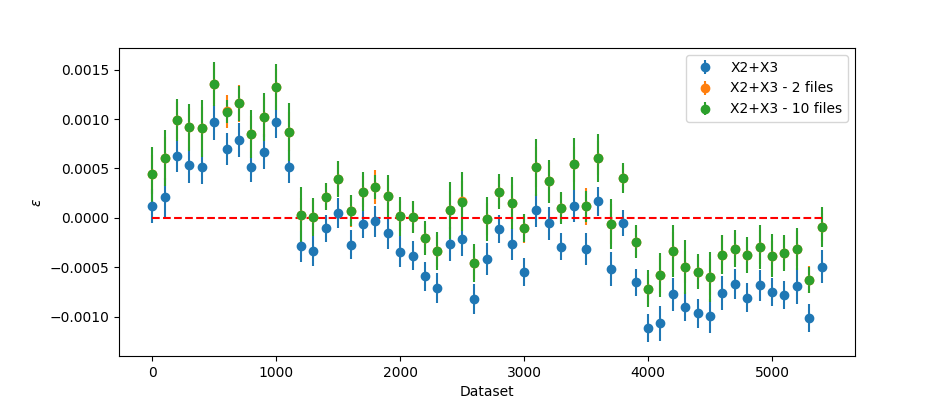

In [96]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(0,5500,100), charge_mean, yerr=charge_std/np.sqrt(100),fmt='o', label='X2+X3')
ax.errorbar(np.arange(0,5500,100), charge_mean1, yerr=charge_std1/np.sqrt(50),fmt='o', label='X2+X3 - 2 files')
ax.errorbar(np.arange(0,5500,100), charge_mean3, yerr=charge_std3/np.sqrt(10),fmt='o', label='X2+X3 - 10 files')
# ax.errorbar(np.arange(0,5500,100), mm_mle_spin6[::2], yerr=charge_std2/np.sqrt(2000),fmt='o', label='X2+X3 - 50 files')
ax.plot(np.arange(0,5500,100), np.arange(0,5500,100)*0, 'r--')
ax.set(xlabel='Dataset', ylabel=r'$\epsilon$')
ax.legend()